<a href="https://colab.research.google.com/github/akfincode/sk-data-analysis/blob/main/tax_withheld_public.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

__author__ = 'fernavid'

In [ ]:
taxes = pd.read_csv('https://raw.githubusercontent.com/fernavid/synthetic_stock_returns/main/taxes.csv', parse_dates=['timestamp'])
taxes = taxes.set_index('timestamp')


###  trailing 52-week sum chart is below
#### 

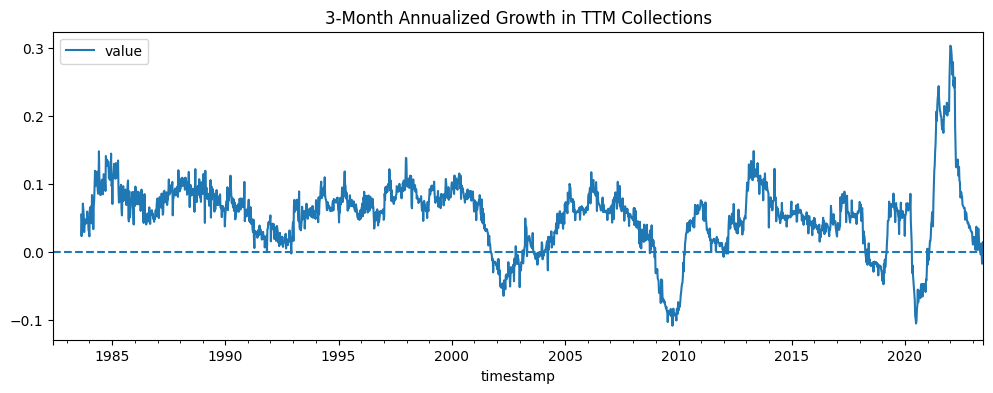

In [ ]:
# weekly sums (week ending in Wednesday since the latest daily data came in on a Wednesday)
weekly_sums = taxes.resample('W-WED').sum()

# trailing 52-week (trailing twelve months) sum of collections
ttm = weekly_sums.rolling(52).sum()

ttm.plot(title='Trailing 12-Month Sum of Collections', figsize=(12, 4))
plt.show()

# now let's look at the 3 month annualized growth rate

# 13-week (52/4) rate of change
roc = ttm.pct_change(13)
# annualize it
ann = ((1+roc)**4)-1

axes = ann.plot(title='3-Month Annualized Growth in TTM Collections', figsize=(12, 4))
axes.axhline(0, ls='--')
plt.show()


#### This looks across each calendar month and calculates the average daily collection. growth is close to 0.
### Review

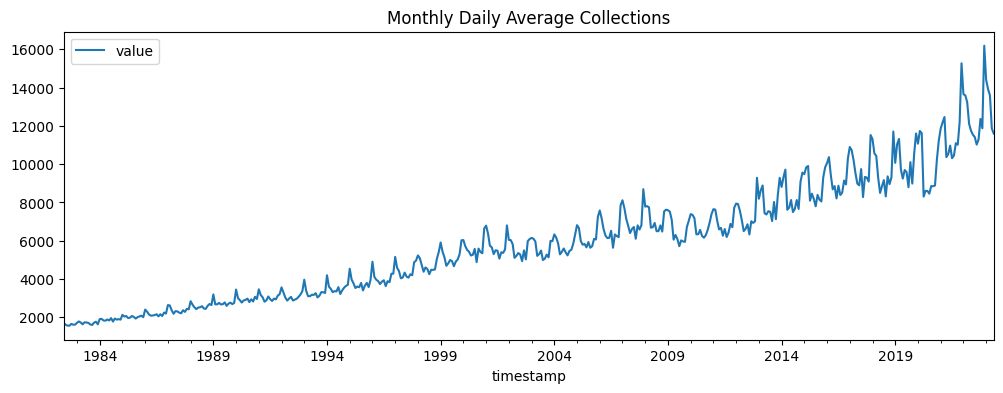

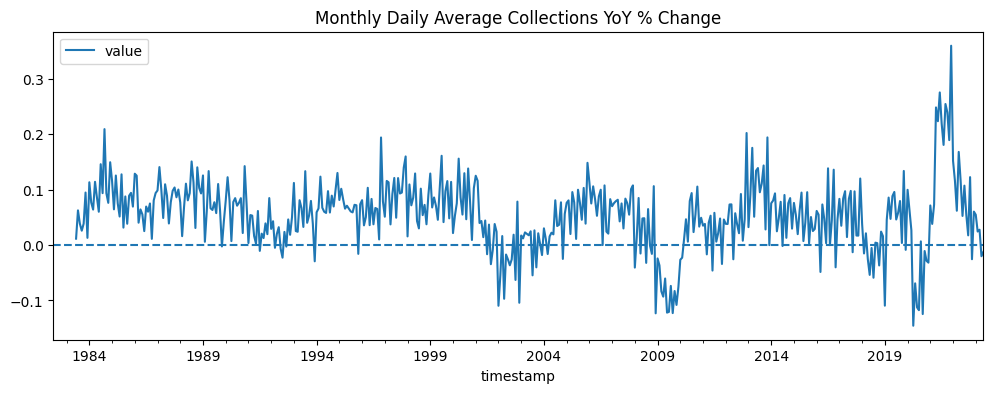

In [ ]:
#Raw series has 0 for weekends and holidays, so let's only include days where collections are nonzero
nonzero = taxes[taxes>0]
monthly_daily_avg = nonzero.resample('M').mean()
# this is a mid month update, so the latest month's (June) average is incomplete so we remove it to be safe
monthly_daily_avg = monthly_daily_avg.iloc[:-1]

monthly_daily_avg.plot(title='Monthly Daily Average Collections', figsize=(12, 4))
plt.show()

# I think he does a year over year change in this new monthly series

yoy = monthly_daily_avg.pct_change(12)
axes = yoy.plot(title='Monthly Daily Average Collections YoY % Change', figsize=(12, 4))
axes.axhline(0, ls='--')
plt.show()


### Below is the original seasonally adjusted series
#### 

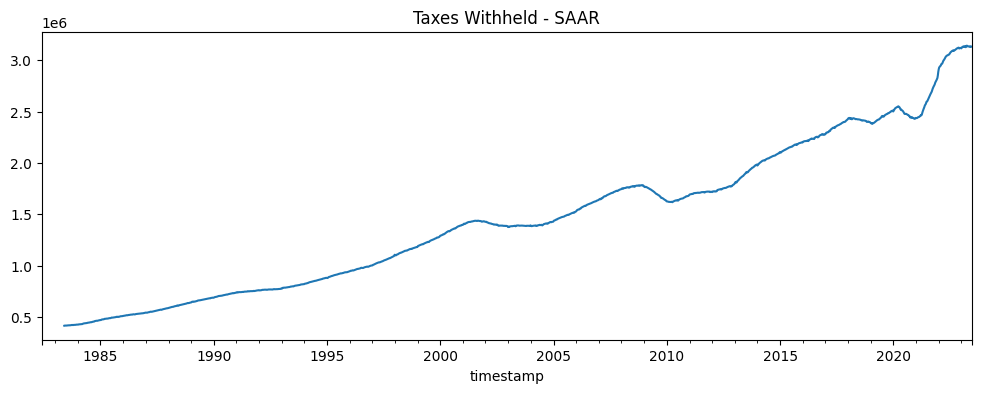

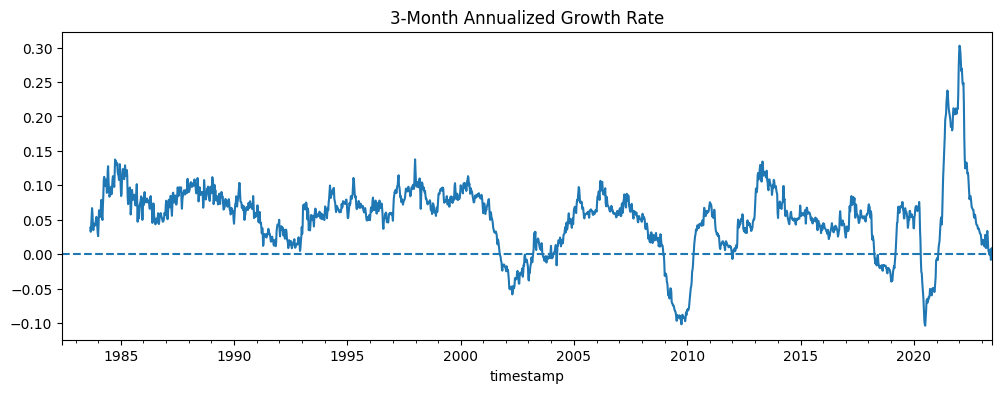

In [ ]:
# original seasonally adjusted series

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(taxes.resample('W-WED').sum(), model='multiply', period=52, two_sided=False)

# annualize the seasonal weekly series
ann = (result.trend * 52)

ann.plot(title='Taxes Withheld - SAAR', figsize=(12, 4))
plt.show()

# 13-week (52/4) rate of change
roc = ann.pct_change(13)
# annualize it
ann = ((1+roc)**4)-1

axes = ann.plot(title='3-Month Annualized Growth Rate', figsize=(12, 4))
axes.axhline(0, ls='--')
plt.show()
